In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
sns.set()

## Loading Data

In [2]:
raw_data = pd.read_csv('Countries-Clustering.csv')

In [3]:
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       241 non-null    object 
 1   Longitude  241 non-null    float64
 2   Latitude   241 non-null    float64
 3   continent  241 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.7+ KB


## Plotting Lats and Logs of Countries

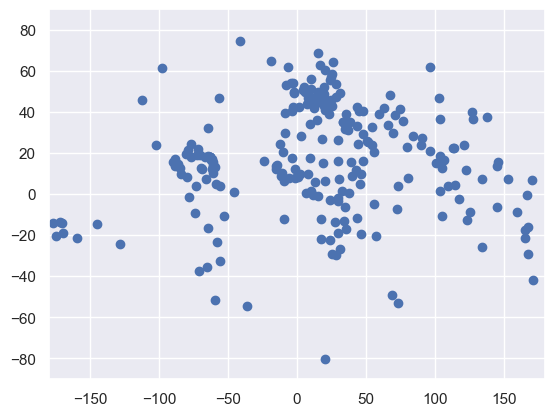

In [5]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Implementing Clustering

In [6]:
x = raw_data.iloc[:,1:3]
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


## Choose The Number of Clusters

In [7]:
def best_number_of_cluster(data, max_num_clusters):
    total_wcss = []
    for i in range(1, max_num_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss = kmeans.inertia_
        total_wcss.append(wcss)
    
    return total_wcss

In [8]:
wcss_clusters = best_number_of_cluster(x, 9)

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [9]:
wcss_clusters

[1413859.6798344273,
 657012.0797586325,
 325235.52237055905,
 256595.2235602978,
 192217.11970120718,
 152164.1522106638,
 126799.10093907749,
 102913.61962302419]

### Elbow Method

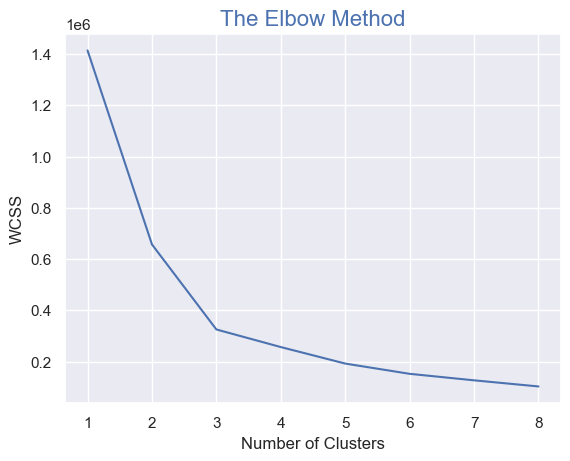

In [10]:
number_clusters = range(1, 9)
plt.plot(number_clusters, wcss_clusters)
plt.title('The Elbow Method', size=16, color='b')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [11]:
best_num_cluster = 4 # according to the above figure, the best number of clusters can be considered 4.
kmeans = KMeans(n_clusters=best_num_cluster, n_init='auto', random_state=42)
kmeans.fit(x)

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=42)

## Clustering Results

In [12]:
specified_clusters = kmeans.fit_predict(x)
specified_clusters

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 3, 3, 3, 0, 1, 0, 1, 0, 2, 0, 1, 2, 3, 0, 0, 3, 3, 3,
       2, 3, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0, 3, 1, 2, 3, 0,
       0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 1, 3, 1, 3, 1, 0, 0,
       3, 3, 0, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 1, 3, 1,
       2, 1, 2, 0, 1, 3, 1, 3, 2, 3, 0, 2, 0, 3, 0, 0, 3, 0, 3, 1, 3, 0,
       2, 0, 0, 0, 0, 2, 1, 1, 2, 3, 0, 2, 0, 3, 3, 1, 3, 0, 0, 3, 3, 3,
       2, 1, 3, 3, 3, 0, 0, 1, 2, 3, 3, 3, 2, 3, 2, 2, 0, 3, 1, 0, 0, 2,
       0, 2, 3, 2, 3, 1, 1, 3, 3, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 3, 1,
       2, 3, 1, 0, 1, 0, 3, 2, 0, 3, 0, 0, 0, 3, 2, 1, 3, 2, 3, 1, 3, 0,
       0, 1, 3, 3, 1, 3, 3, 3, 0, 1, 0, 0, 1, 3, 3, 2, 0, 0, 2, 1, 1, 3,
       3, 2, 0, 0, 3, 1, 1, 0, 3, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

In [13]:
data_with_clusters = raw_data.copy()
data_with_clusters['Clusters'] = specified_clusters
data_with_clusters.head()

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,North America,1
1,Afghanistan,66.004734,33.835231,Asia,0
2,Angola,17.537368,-12.293361,Africa,0
3,Anguilla,-63.064989,18.223959,North America,1
4,Albania,20.049834,41.142450,Europe,3


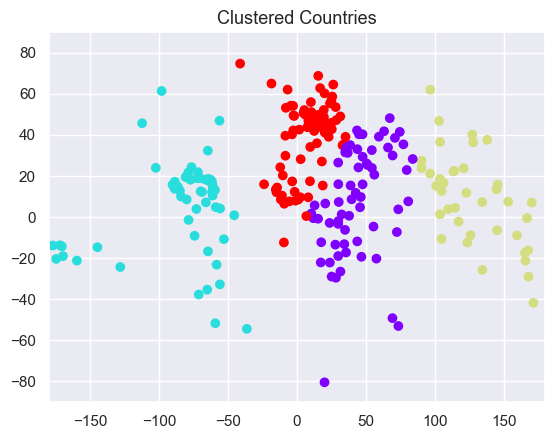

In [14]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], 
            c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title('Clustered Countries', size=13)
plt.show()

## Clustering Categorical Data

In [15]:
data_maped = raw_data.copy()
data_maped.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [16]:
encoder = OneHotEncoder(sparse_output=False)
encoded_continent = encoder.fit_transform(data_maped[['continent']])

In [17]:
df_encoded_continent = pd.DataFrame(encoded_continent, columns=encoder.get_feature_names_out())

In [18]:
df_encoded_continent.head()

,continent_Africa,continent_Antarctica,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_Seven seas (open ocean),continent_South America
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
droped_continent = data_maped.drop(['continent'], axis=1)
encoded_data = pd.concat([droped_continent, df_encoded_continent], axis=1)

In [20]:
encoded_data.head()

,name,Longitude,Latitude,continent_Africa,continent_Antarctica,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_Seven seas (open ocean),continent_South America
0,Aruba,-69.982677,12.520880,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Afghanistan,66.004734,33.835231,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Angola,17.537368,-12.293361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Anguilla,-63.064989,18.223959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Albania,20.049834,41.142450,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Feature Selection

In [21]:
x = encoded_data.iloc[:, 1:]

## Clustering

In [22]:
kmeans = KMeans(8)
kmeans.fit(x)

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [23]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 7, 1, 3, 3, 3, 0, 1, 0, 5, 7, 2, 7, 1, 2, 3, 0, 7, 3, 6, 6,
       4, 3, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 4, 4, 7, 6, 3, 1, 4, 6, 6,
       7, 6, 5, 1, 7, 6, 1, 1, 1, 1, 0, 0, 3, 3, 0, 1, 3, 1, 6, 1, 0, 0,
       3, 3, 0, 3, 2, 1, 3, 3, 2, 6, 3, 0, 3, 6, 6, 6, 6, 6, 3, 1, 3, 1,
       2, 1, 4, 7, 1, 3, 1, 3, 4, 3, 4, 4, 7, 3, 0, 0, 3, 0, 3, 1, 3, 0,
       4, 0, 0, 7, 0, 4, 1, 1, 4, 3, 0, 4, 0, 6, 3, 1, 3, 4, 7, 3, 3, 3,
       4, 1, 6, 3, 3, 7, 0, 1, 2, 3, 6, 3, 4, 3, 4, 2, 7, 6, 1, 7, 7, 4,
       7, 2, 6, 2, 6, 1, 5, 3, 3, 4, 2, 2, 0, 0, 1, 5, 1, 4, 2, 2, 3, 1,
       4, 3, 1, 0, 5, 0, 3, 4, 7, 6, 0, 0, 7, 6, 4, 1, 6, 2, 6, 1, 3, 0,
       0, 1, 3, 6, 1, 3, 3, 3, 7, 1, 7, 0, 1, 6, 6, 4, 0, 0, 2, 5, 1, 3,
       0, 4, 7, 7, 3, 1, 1, 0, 3, 1, 1, 1, 1, 4, 2, 5, 5, 0, 7, 7, 7])

In [24]:
data_with_clusters = droped_continent.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,7
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,7
239,Zambia,27.774759,-13.458242,7


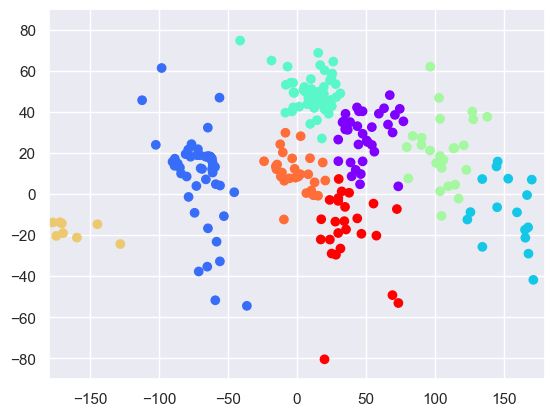

In [25]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow') 
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()